<center><h1> South German Credit </h1></center

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('SouthGermanCredit.asc', sep=' ')
data.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


# Data visualization 

Countplots of the categorical variables: status, credit history, purpose, savings, employment duration, installment rate, personal status sex, other debtors, present residence, property, other installment plans, housing, number credits, job, people liable, telephone, foreign worker, credit risk.

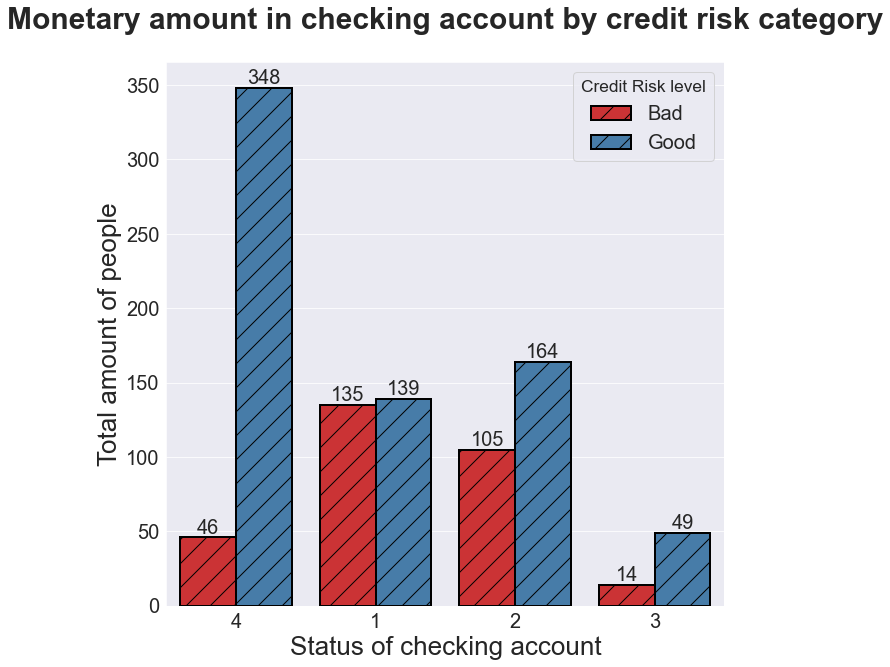

In [3]:
data['status'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['status'], hue=data['credit_risk'], order=data['status'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Monetary amount in checking account by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Status of checking account', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

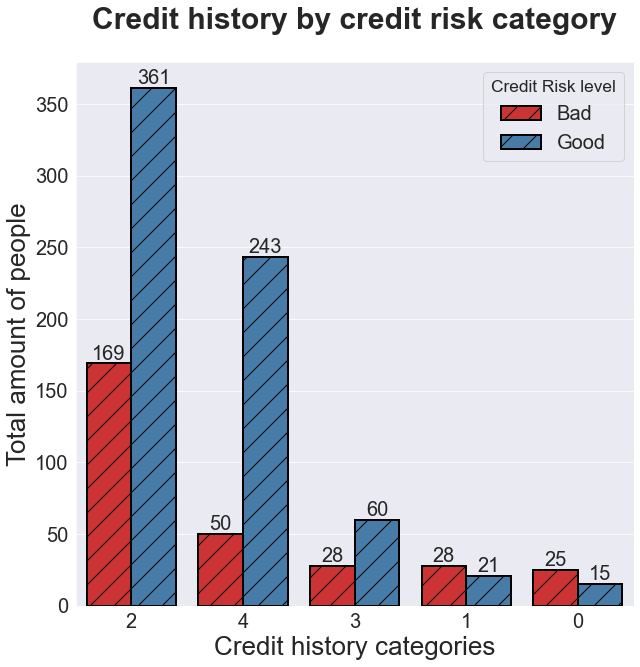

In [4]:
data['credit_history'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['credit_history'], hue=data['credit_risk'], order=data['credit_history'].value_counts().iloc[:5].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit history by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Credit history categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

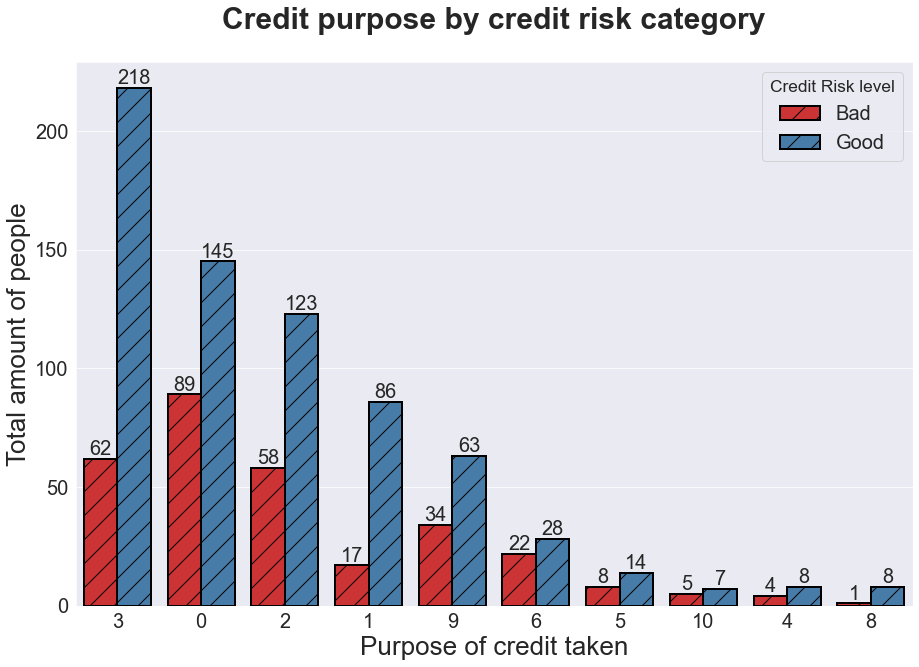

In [5]:
data['purpose'].unique()

plt.rcParams["figure.figsize"]=(15,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['purpose'], hue=data['credit_risk'], order=data['purpose'].value_counts().iloc[:11].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit purpose by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Purpose of credit taken', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

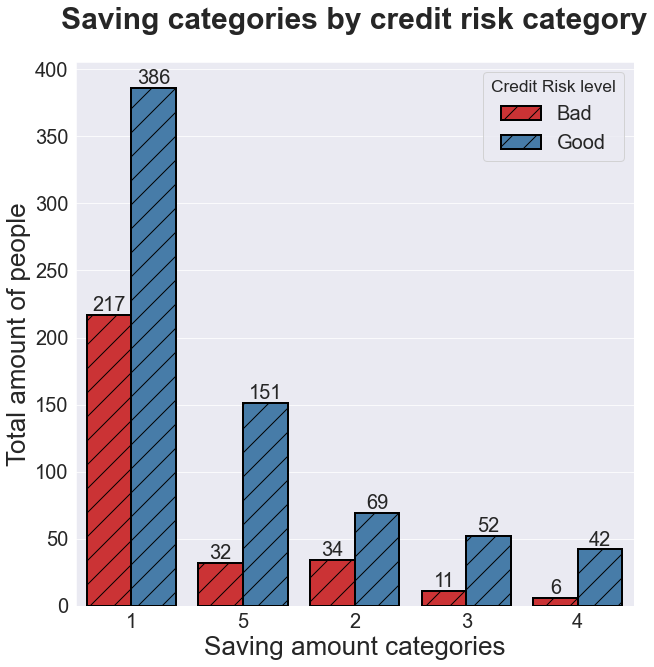

In [6]:
data['savings'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['savings'], hue=data['credit_risk'], order=data['savings'].value_counts().iloc[:5].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Saving categories by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Saving amount categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

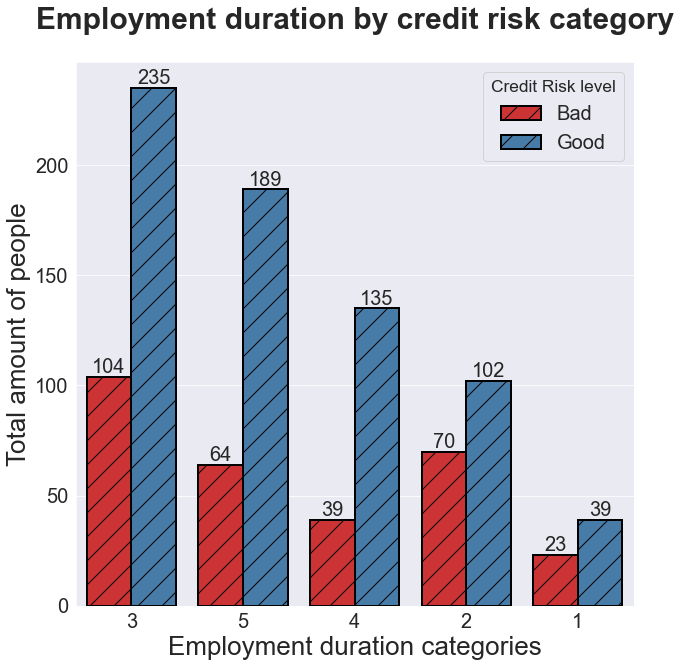

In [7]:
data['employment_duration'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['employment_duration'], hue=data['credit_risk'], order=data['employment_duration'].value_counts().iloc[:5].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Employment duration by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Employment duration categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

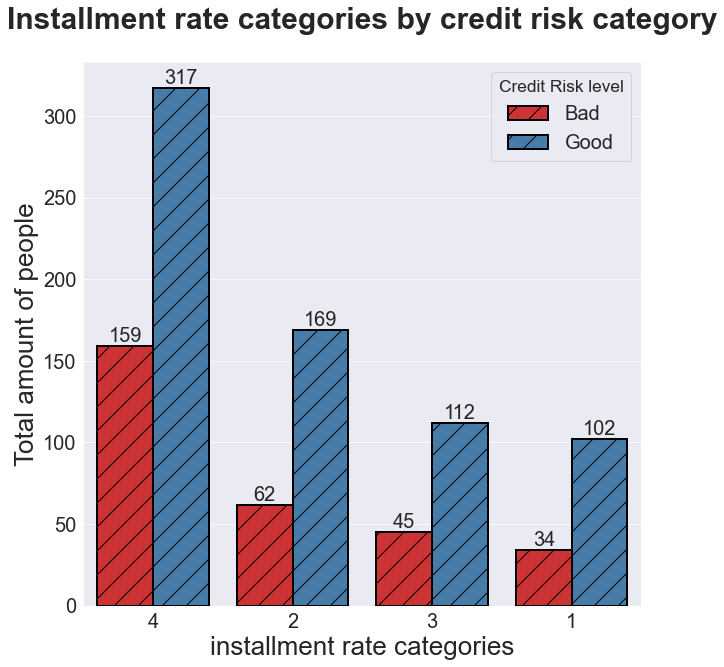

In [8]:
data['installment_rate'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['installment_rate'], hue=data['credit_risk'], order=data['installment_rate'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Installment rate categories by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('installment rate categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

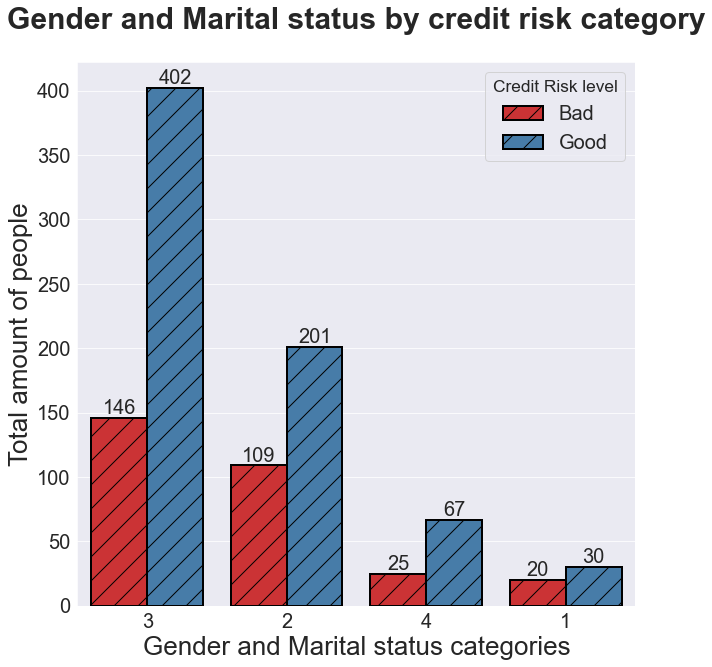

In [9]:
data['personal_status_sex'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['personal_status_sex'], hue=data['credit_risk'], order=data['personal_status_sex'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Gender and Marital status by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Gender and Marital status categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

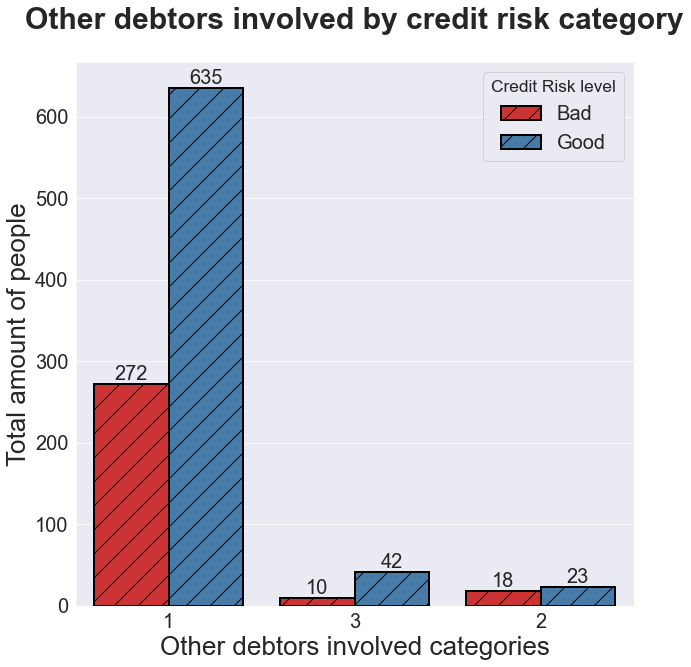

In [10]:
data['other_debtors'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['other_debtors'], hue=data['credit_risk'], order=data['other_debtors'].value_counts().iloc[:3].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Other debtors involved by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Other debtors involved categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

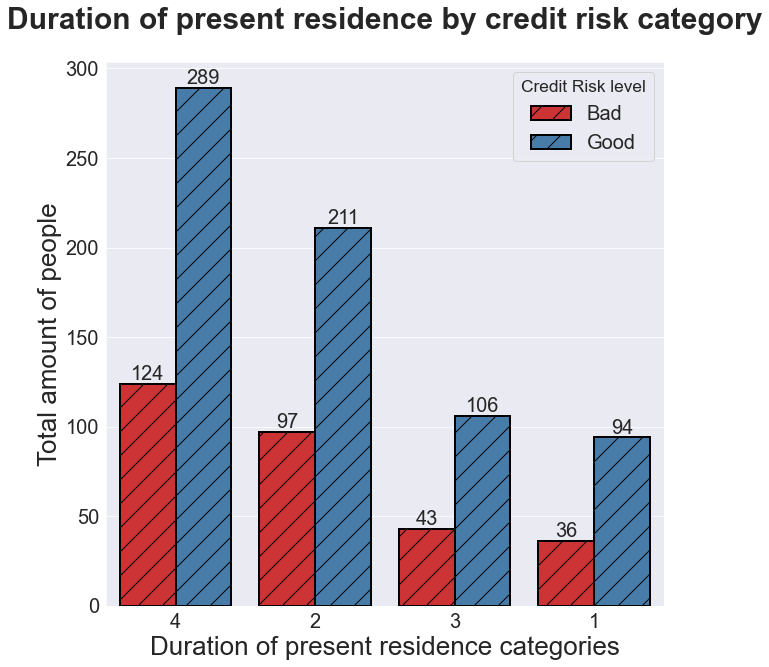

In [11]:
data['present_residence'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['present_residence'], hue=data['credit_risk'], order=data['present_residence'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Duration of present residence by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Duration of present residence categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

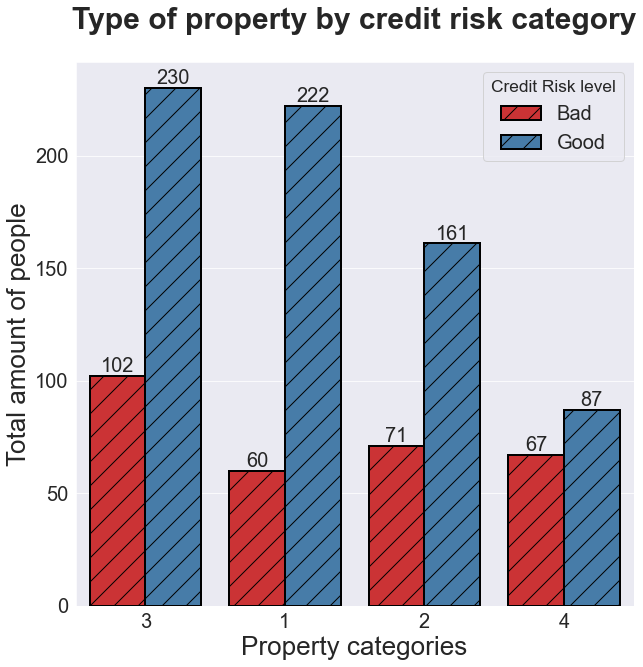

In [12]:
data['property'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['property'], hue=data['credit_risk'], order=data['property'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Type of property by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Property categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

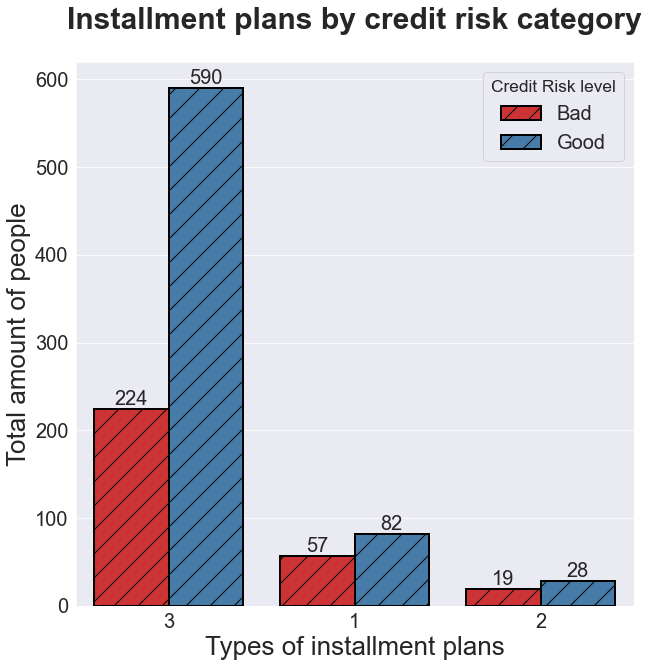

In [13]:
data['other_installment_plans'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['other_installment_plans'], hue=data['credit_risk'], order=data['other_installment_plans'].value_counts().iloc[:3].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Installment plans by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Types of installment plans', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

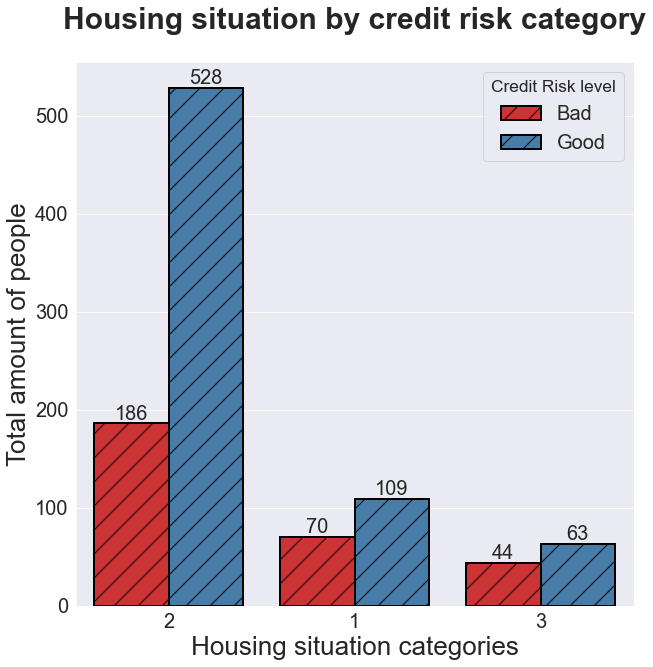

In [14]:
data['housing'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['housing'], hue=data['credit_risk'], order=data['housing'].value_counts().iloc[:3].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Housing situation by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Housing situation categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

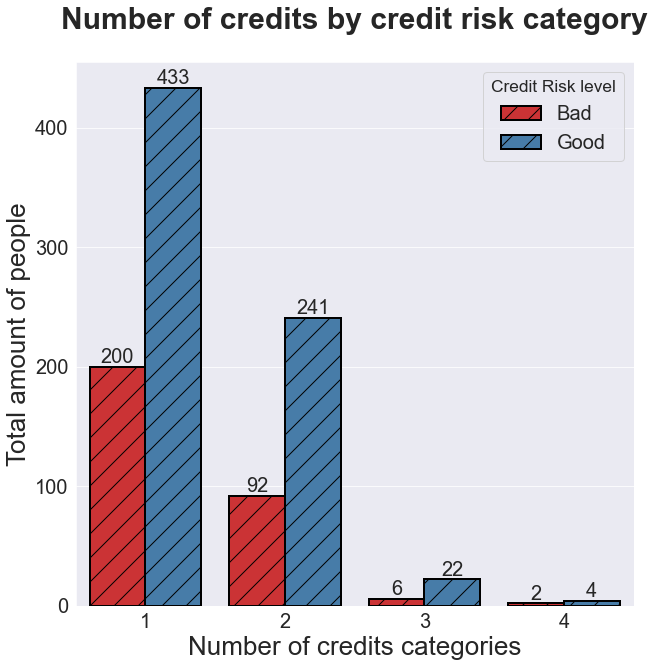

In [15]:
data['number_credits'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['number_credits'], hue=data['credit_risk'], order=data['number_credits'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Number of credits by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Number of credits categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

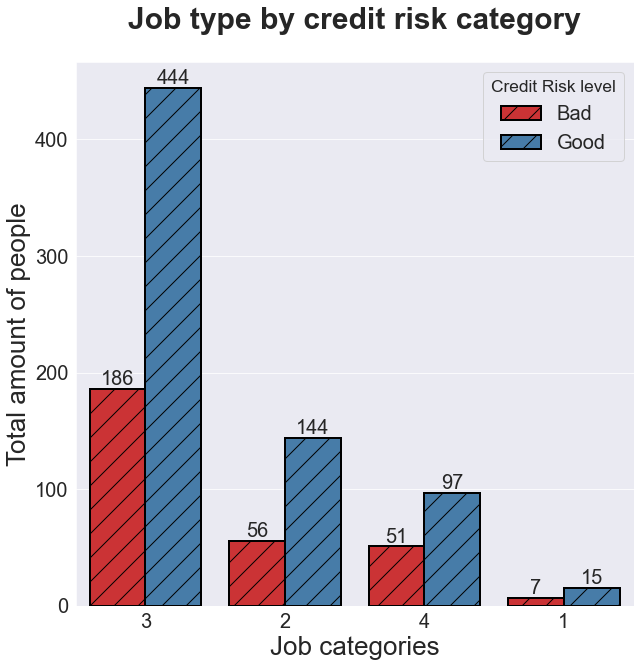

In [16]:
data['job'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['job'], hue=data['credit_risk'], order=data['job'].value_counts().iloc[:4].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Job type by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Job categories', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

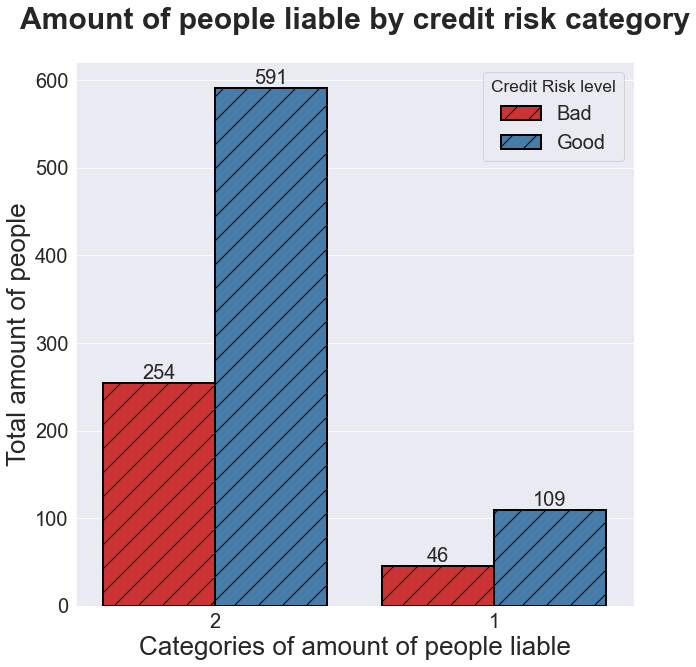

In [17]:
data['people_liable'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['people_liable'], hue=data['credit_risk'], order=data['people_liable'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Amount of people liable by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Categories of amount of people liable', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

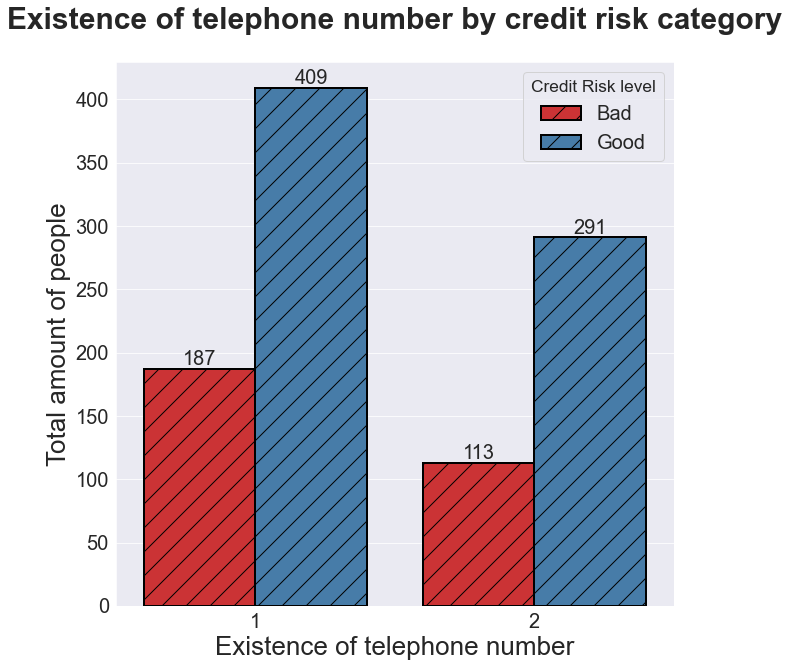

In [18]:
data['telephone'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['telephone'], hue=data['credit_risk'], order=data['telephone'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Existence of telephone number by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Existence of telephone number', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

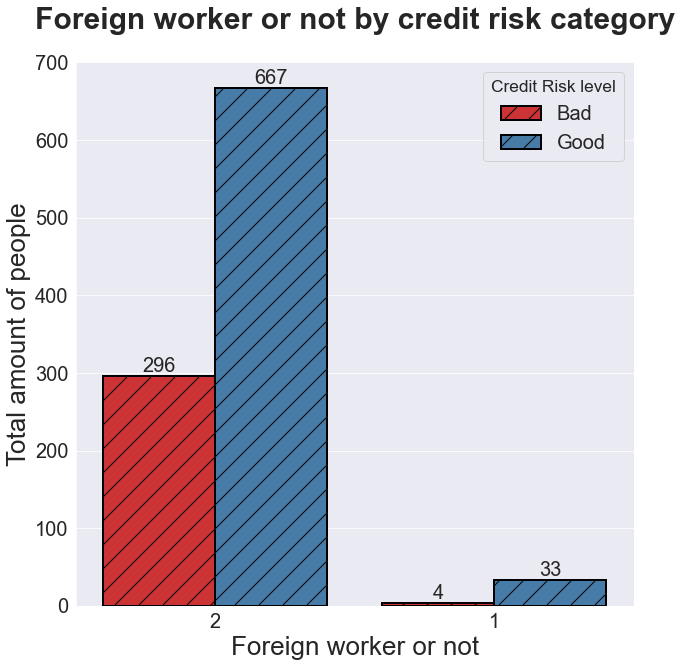

In [19]:
data['foreign_worker'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['foreign_worker'], hue=data['credit_risk'], order=data['foreign_worker'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Foreign worker or not by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Foreign worker or not', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

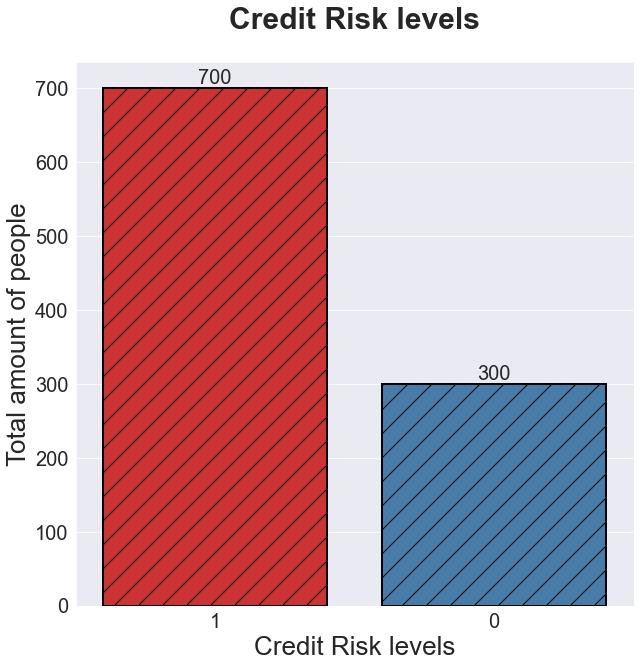

In [20]:
data['credit_risk'].unique()

plt.rcParams["figure.figsize"]=(10,10)
sns.set_style('darkgrid')
ax = sns.countplot(x=data['credit_risk'], order=data['credit_risk'].value_counts().iloc[:2].index, palette='Set1', lw=2, ec='black', hatch='/')
for case in ax.containers:
    ax.bar_label(case, size=20)
plt.title('Credit Risk levels', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Credit Risk levels', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Histograms of the continuous variables "Duration", "Amount" and "Age".

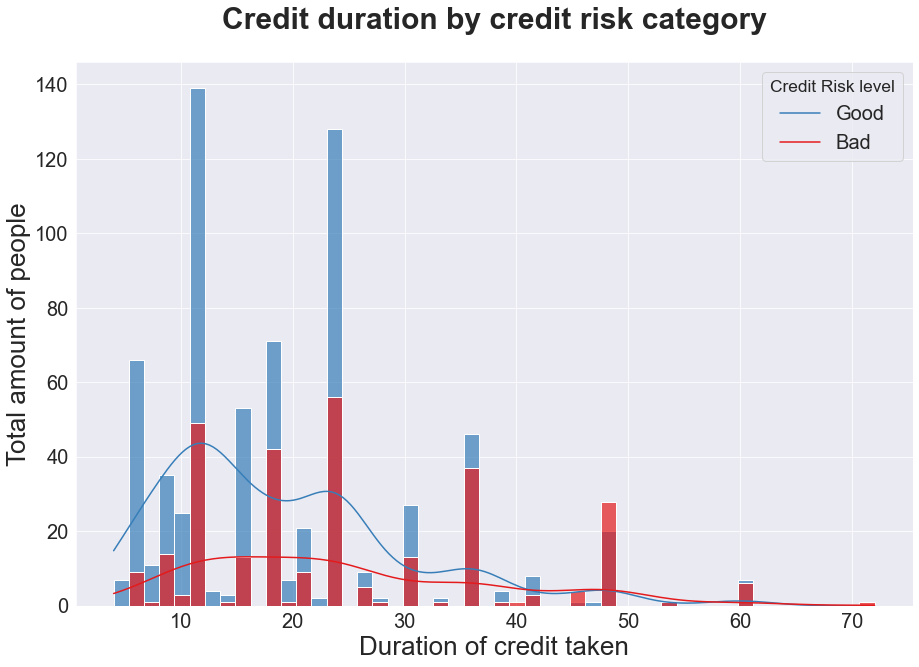

In [21]:
data['duration'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data['duration'], kde=True, alpha=0.7, hue=data['credit_risk'], palette='Set1', bins=50, fill=True)
plt.title('Credit duration by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Duration of credit taken', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Good','Bad'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

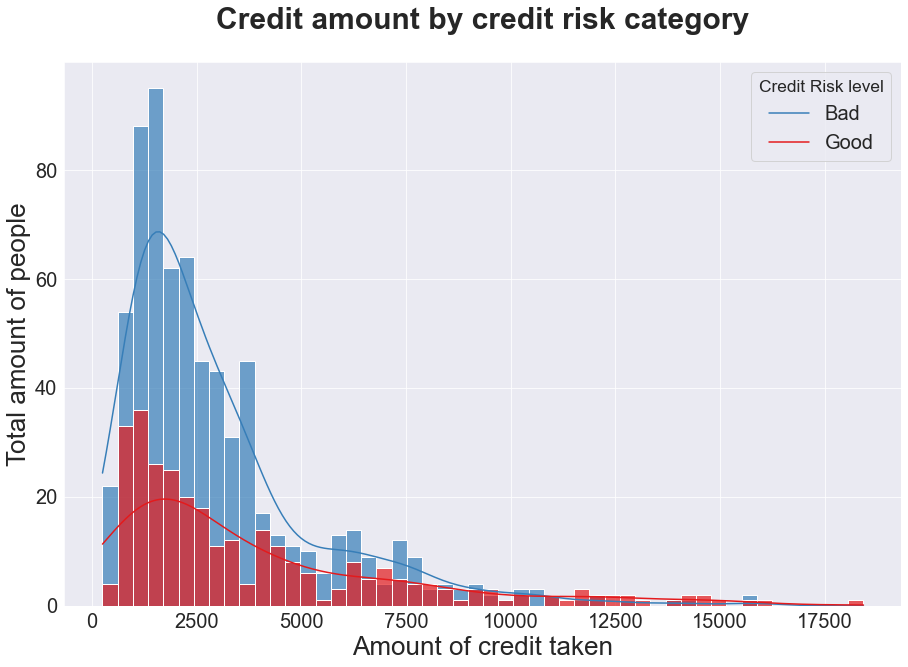

In [22]:
data['amount'].unique()

plt.rcParams['figure.figsize']=(15,10)
sns.histplot(x=data['amount'], kde=True, alpha=0.7, hue=data['credit_risk'], palette='Set1', bins=50, fill=True)
plt.title('Credit amount by credit risk category', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Amount of credit taken', fontsize=26)
plt.ylabel('Total amount of people', fontsize=26)
plt.legend(['Bad','Good'], title='Credit Risk level', prop={'size': 20}, title_fontsize='xx-large')
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Boxplots of the Continuous Variables "Duration", "Amount" and "Age".

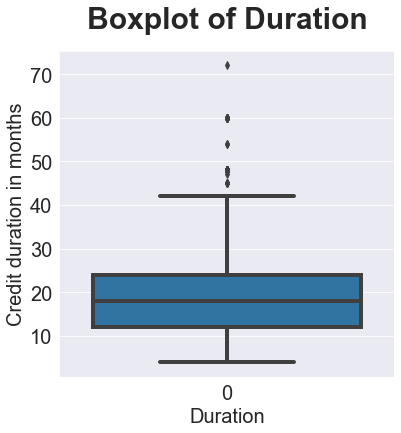

In [23]:
plt.rcParams["figure.figsize"]=(6,6)
sns.set_style('darkgrid')
sns.boxplot(data=data['duration'], linewidth=4)
plt.title('Boxplot of Duration', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Duration', fontsize=20)
plt.ylabel('Credit duration in months', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

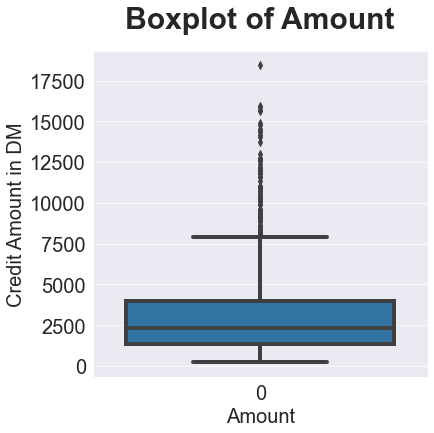

In [24]:
plt.rcParams["figure.figsize"]=(6,6)
sns.set_style('darkgrid')
sns.boxplot(data=data['amount'], linewidth=4)
plt.title('Boxplot of Amount', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Amount', fontsize=20)
plt.ylabel('Credit Amount in DM', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

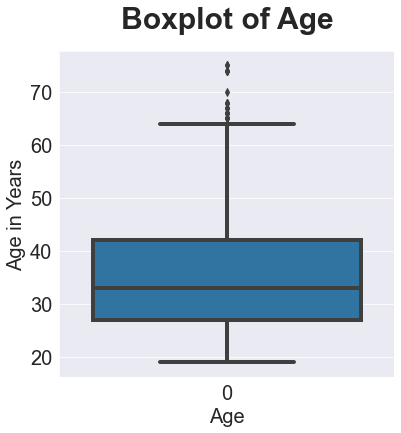

In [25]:
plt.rcParams["figure.figsize"]=(6,6)
sns.set_style('darkgrid')
sns.boxplot(data=data['age'], linewidth=4)
plt.title('Boxplot of Age', fontsize=30, y=1.05, weight='bold')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Age in Years', fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()